In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [21]:
df_A = pd.read_csv("Datasets\df_A.csv")
df_B = pd.read_csv("Datasets\df_B.csv")

In [22]:
# List of DataFrame names for location_A
df_names_A = [
    "A1_df", "A2_df", "A3_df", "A5_df", "A12_df", "A19_df", "A20_df", 
    "A23_df", "A24_df", "A25_df", "A26_df", "A27_df", "A28_df", 
    "A32_df", "A34_df", "A36_df", "A37_df", "A39_df", "A42_df", 
    "A43_df", "A44_df", "A45_df"
]

# Dictionary to store the imported DataFrames
location_A = {}

# Load each CSV file into a DataFrame
for df_name in df_names_A:
    csv_filename = f"Datasets\sensor_wise_data\{df_name}.csv"
    location_A[df_name] = pd.read_csv(csv_filename)

In [23]:
# List of DataFrame names for location_B
df_names_B = [
    "B4_df", "B6_df", "B8_df", "B9_df", "B10_df", "B11_df", "B13_df", 
    "B14_df", "B15_df", "B16_df", "B17_df", "B18_df", "B21_df", 
    "B29_df", "B30_df", "B31_df", "B33_df", "B35_df", "B38_df", 
    "B40_df", "B41_df"
]

# Dictionary to store the imported DataFrames
location_B = {}

# Load each CSV file into a DataFrame
for df_name in df_names_B:
    csv_filename = f"Datasets\sensor_wise_data\{df_name}.csv"
    location_B[df_name] = pd.read_csv(csv_filename)

In [24]:
location_B['B6_df']

,DATE_TIME,DATE,TIME,DC_POWER,AC_POWER,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,2020-05-15,00:00:00,0.0,0.0,0.0,NaN,1.215279e+09,NaN,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,2020-05-15,00:15:00,0.0,0.0,0.0,0.0,1.215279e+09,0.0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,2020-05-15,00:30:00,0.0,0.0,0.0,0.0,1.215279e+09,0.0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,2020-05-15,00:45:00,0.0,0.0,0.0,0.0,1.215279e+09,0.0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,2020-05-15,01:00:00,0.0,0.0,0.0,0.0,1.215279e+09,0.0,26.596148,25.088210,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,2020-06-17,22:45:00,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,2020-06-17,23:00:00,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,2020-06-17,23:15:00,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,2020-06-17,23:30:00,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,23.291048,22.373909,0.0


In [25]:
temp = location_B['B6_df'][location_B['B6_df']['TOTAL_YIELD'] > 0]
temp = temp[temp['TOTAL_YIELD_diff'] >= 0]
temp

,DATE_TIME,DATE,TIME,DC_POWER,AC_POWER,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1,2020-05-15 00:15:00,2020-05-15,00:15:00,0.0,0.0,0.0,0.0,1.215279e+09,0.0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,2020-05-15,00:30:00,0.0,0.0,0.0,0.0,1.215279e+09,0.0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,2020-05-15,00:45:00,0.0,0.0,0.0,0.0,1.215279e+09,0.0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,2020-05-15,01:00:00,0.0,0.0,0.0,0.0,1.215279e+09,0.0,26.596148,25.088210,0.0
5,2020-05-15 01:15:00,2020-05-15,01:15:00,0.0,0.0,0.0,0.0,1.215279e+09,0.0,26.512740,25.317970,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,2020-06-17,22:45:00,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,2020-06-17,23:00:00,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,2020-06-17,23:15:00,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,2020-06-17,23:30:00,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,23.291048,22.373909,0.0


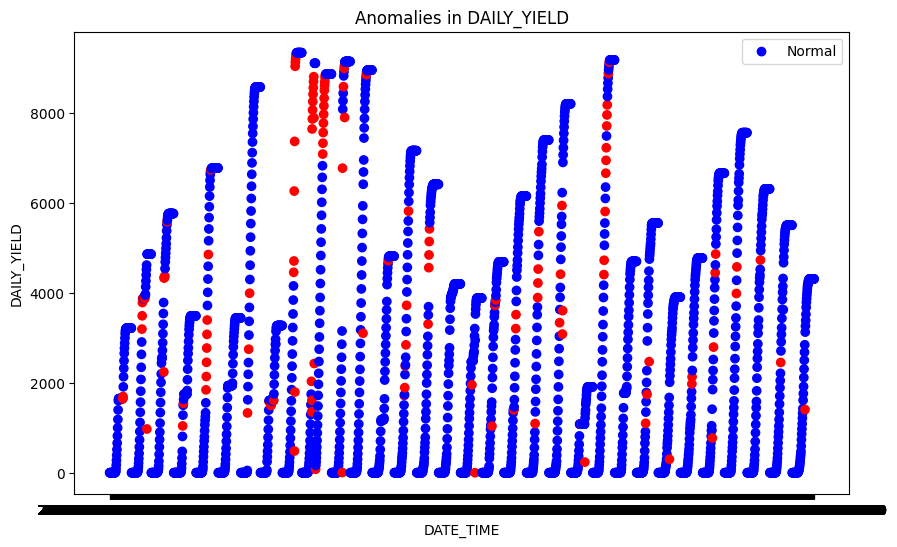

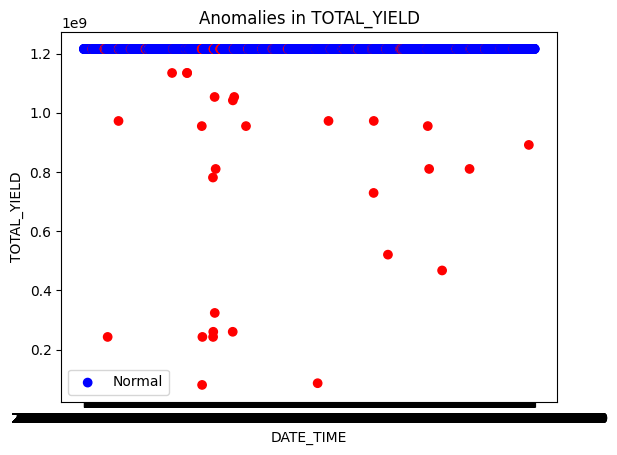

In [26]:
# Select relevant features for anomaly detection
features = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 
            'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

# df = location_B['B6_df'].copy()
# df = df[(df['DATE'] == '2020-05-22')]

df = temp
df.dropna(inplace=True)

# Prepare the data
data = df[features]

# Initialize and fit the IsolationForest model
isolation_forest = IsolationForest(n_estimators=200, contamination=0.05, random_state=0, max_samples=0.7)
df['anomaly_score'] = isolation_forest.fit_predict(data)

# Label anomalies (anomaly_score = -1 indicates an anomaly, 1 indicates normal)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Filter for anomalies
anomalies = df[df['is_anomaly'] == 'Anomaly']

# Save the anomalies to a CSV
# anomalies.to_csv('anomalies.csv', index=False)


plt.figure(figsize=(10, 6))
plt.scatter(df['DATE_TIME'], df['DAILY_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('DAILY_YIELD')
plt.title('Anomalies in DAILY_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['TOTAL_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('TOTAL_YIELD')
plt.title('Anomalies in TOTAL_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

In [27]:
df_names_A = [
    "A1_df", "A2_df", "A3_df", "A5_df", "A12_df", "A19_df", "A20_df", 
    "A23_df", "A24_df", "A25_df", "A26_df", "A27_df", "A28_df", 
    "A32_df", "A34_df", "A36_df", "A37_df", "A39_df", "A42_df", 
    "A43_df", "A44_df", "A45_df"
]

for df_name in df_names_A:
    temp = location_A[df_name][location_A[df_name]['TOTAL_YIELD'] > 0].copy()
    temp = temp[temp['TOTAL_YIELD_diff'] >= 0]

    # Select relevant features for anomaly detection
    features = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 
                'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

    df = temp
    df.dropna(inplace=True)

    # Prepare the data
    data = df[features]

    # Initialize and fit the IsolationForest model
    isolation_forest = IsolationForest(n_estimators=200, contamination=0.05, random_state=0, max_samples=0.7)
    df['anomaly_score'] = isolation_forest.fit_predict(data)

    # Label anomalies (anomaly_score = -1 indicates an anomaly, 1 indicates normal)
    df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')


    final_df = df[df['is_anomaly'] == 'Normal']

    final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)

    final_df.to_csv(f"Datasets\Anti_Anomaly_data\Anti_Anomaly_{df_name}.csv", index=False)

C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_7640\2900187359.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)
C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_7640\2900187359.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)
C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_7640\2900187359.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [28]:
df_names_B = [
    "B4_df", "B6_df", "B8_df", "B9_df", "B10_df", "B11_df", "B13_df", 
    "B14_df", "B15_df", "B16_df", "B17_df", "B18_df", "B21_df", 
    "B29_df", "B30_df", "B31_df", "B33_df", "B35_df", "B38_df", 
    "B40_df", "B41_df"
]

for df_name in df_names_B:
    temp = location_B[df_name][location_B[df_name]['TOTAL_YIELD'] > 0].copy()
    temp = temp[temp['TOTAL_YIELD_diff'] >= 0]

    # Select relevant features for anomaly detection
    features = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 
                'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

    df = temp
    df.dropna(inplace=True)

    # Prepare the data
    data = df[features]

    # Initialize and fit the IsolationForest model
    isolation_forest = IsolationForest(n_estimators=200, contamination=0.05, random_state=0, max_samples=0.7)
    df['anomaly_score'] = isolation_forest.fit_predict(data)

    # Label anomalies (anomaly_score = -1 indicates an anomaly, 1 indicates normal)
    df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')


    final_df = df[df['is_anomaly'] == 'Normal']

    final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)

    final_df.to_csv(f"Datasets\Anti_Anomaly_data\Anti_Anomaly_{df_name}.csv", index=False)

C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_7640\1240805626.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)
C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_7640\1240805626.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)
C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_7640\1240805626.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [29]:
# final_df.to_csv('final_df.csv', index=False)

In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Dense, Reshape

# Input shape: (sequence_length, num_features)
num_features = 9
input_layer = Input(shape=(4, num_features))

# Encoder
x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(pool_size=2, padding='same')(x)
x = Conv1D(16, kernel_size=3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(pool_size=2, padding='same')(x)

# Decoder
x = Conv1D(16, kernel_size=3, activation='relu', padding='same')(encoded)
x = UpSampling1D(size=2)(x)
x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(x)
x = UpSampling1D(size=2)(x)
decoded = Conv1D(num_features, kernel_size=3, activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

KeyboardInterrupt: 

In [12]:
# Drop non-numerical columns
cleaned_df = final_df.drop(columns=["DATE_TIME", "DATE", "TIME"], errors="ignore")

# Ensure only numerical data
data_array = cleaned_df.to_numpy()

# (Optional) If working with sequences, reshape the data
sequence_length = 4  # Example sequence length
num_features = data_array.shape[1]

# Create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

data_sequences = create_sequences(data_array, sequence_length)

# Check the shape of the data
print("Shape of data_sequences:", data_sequences.shape)

# Train the model
history = autoencoder.fit(
    data_sequences, data_sequences,  # Input and output are the same for an autoencoder
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    shuffle=True
)

Shape of data_sequences: (2837, 4, 9)
Epoch 1/50

36/36 [==============================] - 2s 18ms/step - loss: 164126574579286016.0000 - val_loss: 164151485389602816.0000
Epoch 2/50
36/36 [==============================] - 0s 7ms/step - loss: 164126591759155200.0000 - val_loss: 164151485389602816.0000
Epoch 3/50
36/36 [==============================] - 0s 10ms/step - loss: 164126591759155200.0000 - val_loss: 164151485389602816.0000
Epoch 4/50
36/36 [==============================] - 0s 7ms/step - loss: 164126608939024384.0000 - val_loss: 164151485389602816.0000
Epoch 5/50
36/36 [==============================] - 0s 9ms/step - loss: 164126591759155200.0000 - val_loss: 164151485389602816.0000
Epoch 6/50
36/36 [==============================] - 1s 17ms/step - loss: 164126626118893568.0000 - val_loss: 164151485389602816.0000
Epoch 7/50
36/36 [==============================] - 0s 9ms/step - loss: 164126557399416832.0000 - val_loss: 164151485389602816.0000
Epoch 8/50
36/36 [================

In [13]:
test = location_B['B6_df']

# Drop non-numerical columns
test_df = test.drop(columns=["DATE_TIME", "DATE", "TIME"], errors="ignore")

# Ensure only numerical data
test_df = test_df.to_numpy()

# (Optional) If working with sequences, reshape the data
sequence_length = 4  # Example sequence length
num_features = test_df.shape[1]

# Create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

test_df = create_sequences(test_df, sequence_length)

# Check the shape of the data
print("Shape of data_sequences:", test_df.shape)

Shape of data_sequences: (3256, 4, 9)


In [14]:
# Predict and calculate reconstruction error
reconstructed = autoencoder.predict(test_df)
reconstruction_error = np.mean(np.abs(test_df - reconstructed), axis=1)

# Threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 95)  # Top 5% as anomalies

# Flag anomalies
anomalies = reconstruction_error > threshold

102/102 [==============================] - 0s 3ms/step


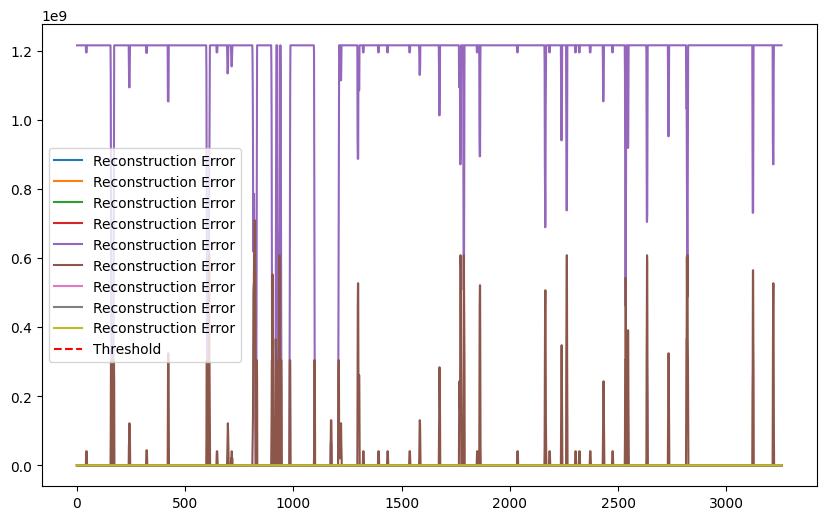

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(reconstruction_error, label='Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()